<a href="https://colab.research.google.com/github/SinghLavanya/Creditcard_Fraud_Prediction/blob/main/Creditcard_Fraud_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries/Dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

Adding the **file**

In [3]:
credit_card_data=pd.read_csv('/content/creditcard.csv')

In [4]:
# printing 1st 5 rows, to check the data
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
# Exploratory Data Analysis (EDA)
credit_card_data.info()
#checking the missing values in the dataset, in each column
print(credit_card_data.isnull().sum())
# distribution of legit transcations & fradulent transactions
print(credit_card_data['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

This Dataset is highly unbalanced

0 ---> Normal transaction
1 ---> Fraudulent transaction

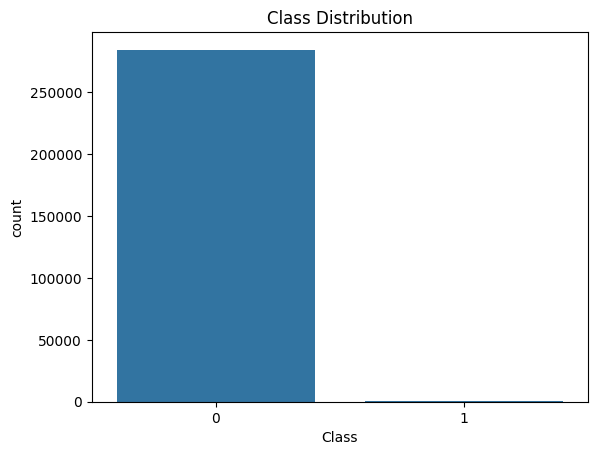

In [11]:
# Visualize class imbalance
sns.countplot(x='Class', data=credit_card_data)
plt.title('Class Distribution')
plt.show()


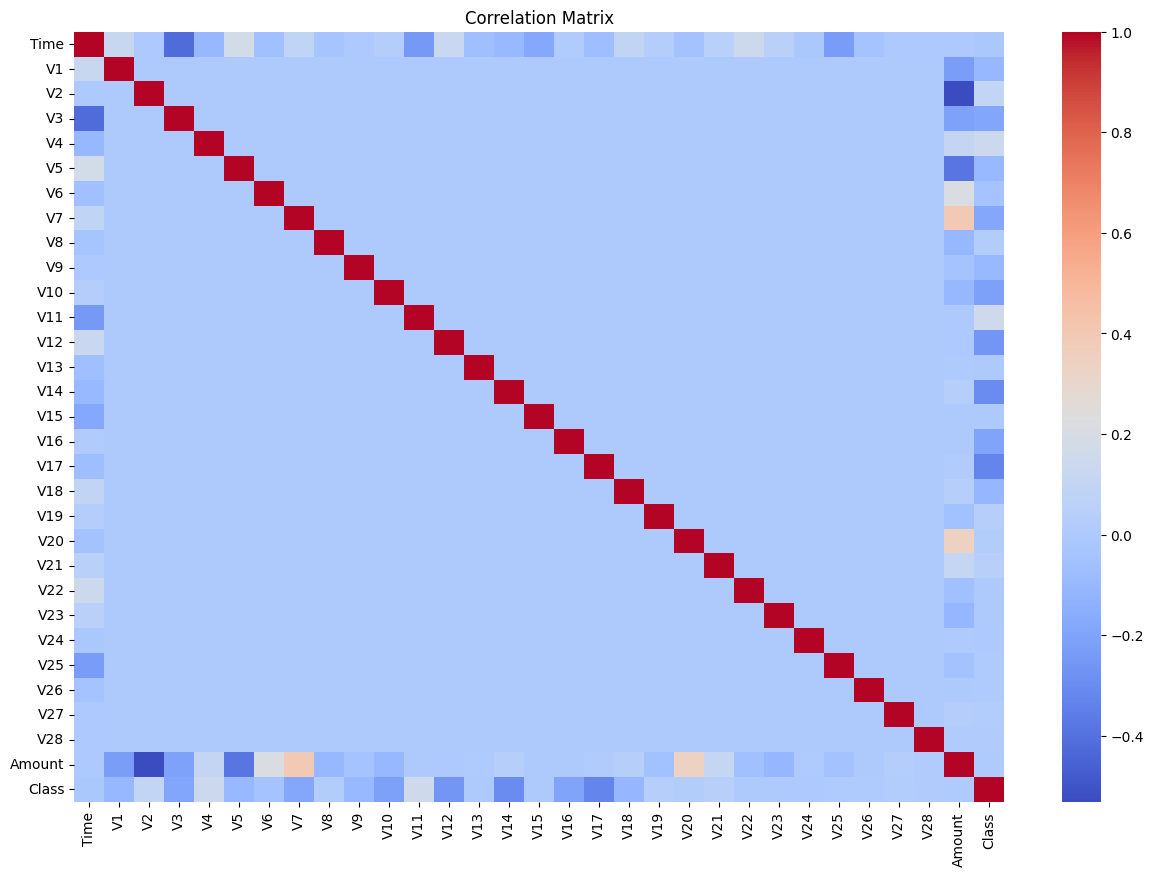

In [12]:
# Visualize correlation matrix
plt.figure(figsize=(15, 10))
corr_matrix = credit_card_data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Sepearting the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

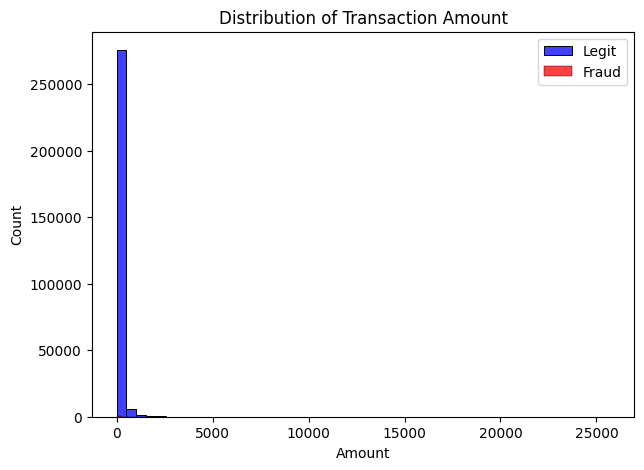

In [18]:
# Visualize distribution of 'Amount' for legitimate vs fraud transactions
plt.figure(figsize=(7, 5))
sns.histplot(credit_card_data[credit_card_data['Class'] == 0]['Amount'], color='blue', bins=50, label='Legit')
sns.histplot(credit_card_data[credit_card_data['Class'] == 1]['Amount'], color='red', bins=10, label='Fraud')
plt.legend()
plt.title('Distribution of Transaction Amount')
plt.show()

In [21]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [22]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [23]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [24]:
# compare the value for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-sampling

Build a sample dataset having similar distribution of normal transactions

and fradulant transactions

In [25]:
legit_sample = legit.sample(n=492)

In [26]:
new_dataset = pd.concat([legit_sample, fraud], axis =0)

In [27]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [28]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37570,39015.0,-0.928406,0.964892,1.425590,0.789053,-0.013545,0.211024,0.579644,-0.240904,0.386752,...,-0.081927,-0.201565,-0.102810,-0.034696,-0.591337,-0.636254,-0.783241,-0.025604,28.98,0
198184,132368.0,1.636679,-1.308155,-2.790015,-0.348951,0.153514,-1.114317,0.938751,-0.644697,-1.562884,...,0.127261,0.335739,-0.416975,-0.281855,0.419229,0.990065,-0.174957,-0.050881,314.99,0
920,694.0,1.330876,-0.241450,-0.139078,-0.562309,0.008856,0.272339,-0.392701,0.143240,0.398763,...,-0.197488,-0.666569,-0.131124,-1.362187,0.279586,0.995649,-0.086141,-0.017577,18.00,0
187234,127447.0,-0.105034,0.059632,-0.498370,-0.741098,1.262432,-0.226889,0.506199,0.199386,0.140873,...,-0.153832,-0.524320,0.236900,-0.012420,-0.653851,0.156193,0.225667,0.102026,32.43,0
283798,171884.0,-1.665536,0.822026,2.083764,1.126954,-0.714900,1.140529,-0.549165,0.752741,0.861616,...,-0.038742,0.145943,-0.464800,0.667335,0.381821,-0.492673,-0.776950,-0.546181,30.00,0


In [29]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [30]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97268.044715,-0.179093,0.168238,-0.122129,-0.089919,-0.017083,-0.027675,-0.069128,0.130725,-0.035636,...,-0.054174,0.022306,-0.048036,0.015246,0.044593,-0.019206,-0.024225,0.022709,0.007599,76.418740
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


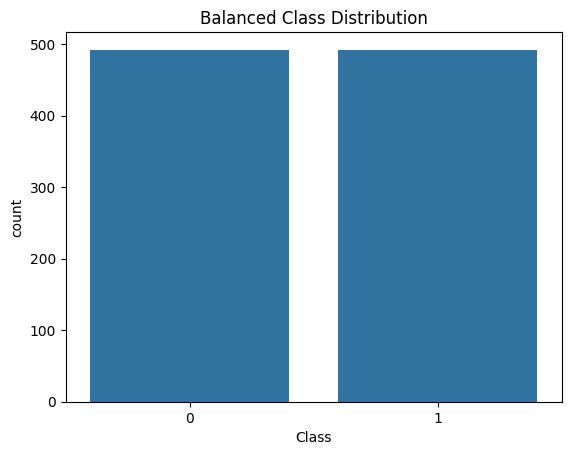

In [31]:
# Visualize the balanced class distribution
sns.countplot(x='Class', data=new_dataset)
plt.title('Balanced Class Distribution')
plt.show()

Spliting the data into Features & Targets

In [32]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [33]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
37570    39015.0 -0.928406  0.964892  1.425590  0.789053 -0.013545  0.211024   
198184  132368.0  1.636679 -1.308155 -2.790015 -0.348951  0.153514 -1.114317   
920        694.0  1.330876 -0.241450 -0.139078 -0.562309  0.008856  0.272339   
187234  127447.0 -0.105034  0.059632 -0.498370 -0.741098  1.262432 -0.226889   
283798  171884.0 -1.665536  0.822026  2.083764  1.126954 -0.714900  1.140529   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [34]:
print(Y)

37570     0
198184    0
920       0
187234    0
283798    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training Data & Testing Data

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25,stratify =Y, random_state= 2 )

In [36]:
print(X.shape,X_train.shape, X_test.shape)

(984, 30) (738, 30) (246, 30)


Model Training

1. Logistic Regression

In [37]:
model= LogisticRegression()

In [38]:
#training the logistic regression Model with training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Acccuracy Score

In [39]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [40]:
print('Accuracy on Training data :', training_data_accuracy)

Accuracy on Training data : 0.940379403794038


In [41]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy sore on the Test Data:', test_data_accuracy)

Accuracy sore on the Test Data: 0.9349593495934959


In [43]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)
print(f'Decision Tree - Training Accuracy: {accuracy_score(Y_train, dt_train_pred)}')
print(f'Decision Tree - Test Accuracy: {accuracy_score(Y_test, dt_test_pred)}')


Decision Tree - Training Accuracy: 1.0
Decision Tree - Test Accuracy: 0.9065040650406504


In [44]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, Y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
print(f'Random Forest - Training Accuracy: {accuracy_score(Y_train, rf_train_pred)}')
print(f'Random Forest - Test Accuracy: {accuracy_score(Y_test, rf_test_pred)}')

Random Forest - Training Accuracy: 1.0
Random Forest - Test Accuracy: 0.9227642276422764


In [45]:
# Gradient Boosting Classifier (XGBoost)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)
print(f'XGBoost - Training Accuracy: {accuracy_score(Y_train, xgb_train_pred)}')
print(f'XGBoost - Test Accuracy: {accuracy_score(Y_test, xgb_test_pred)}')

XGBoost - Training Accuracy: 1.0
XGBoost - Test Accuracy: 0.9227642276422764


In [51]:
# Model Performance Comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
training_scores = [accuracy_score(Y_train, X_train_prediction),
                   accuracy_score(Y_train, dt_train_pred),
                   accuracy_score(Y_train, rf_train_pred),
                   accuracy_score(Y_train, xgb_train_pred)]

test_scores = [accuracy_score(Y_test, X_test_prediction),
               accuracy_score(Y_test, dt_test_pred),
               accuracy_score(Y_test, rf_test_pred),
               accuracy_score(Y_test, xgb_test_pred)]

results = pd.DataFrame({'Model': models, 'Training Accuracy': training_scores, 'Test Accuracy': test_scores})
print(results)


                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.940379       0.934959
1        Decision Tree           1.000000       0.906504
2        Random Forest           1.000000       0.922764
3              XGBoost           1.000000       0.922764


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       123
           1       0.97      0.87      0.92       123

    accuracy                           0.92       246
   macro avg       0.93      0.92      0.92       246
weighted avg       0.93      0.92      0.92       246



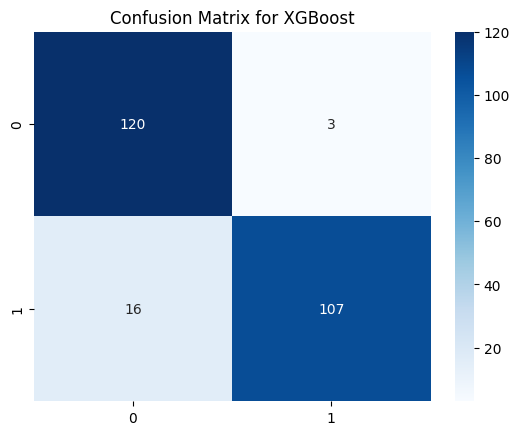

In [47]:
# Confusion Matrix and Classification Report for Best Model
best_model = xgb_model
best_pred = xgb_test_pred
print('Classification Report:\n', classification_report(Y_test, best_pred))
conf_matrix = confusion_matrix(Y_test, best_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.show()

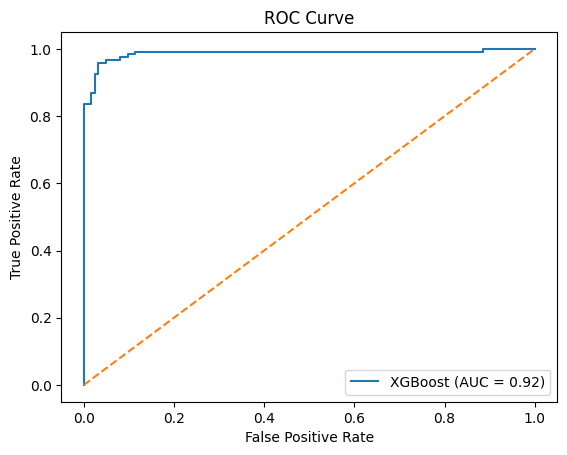

In [48]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, xgb_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(Y_test, best_pred):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()